In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
N1 = 10000
rv1 = np.random.normal(0, 1, N1)

N2 = 3000
rv2 = np.random.normal(0, 3, N2)

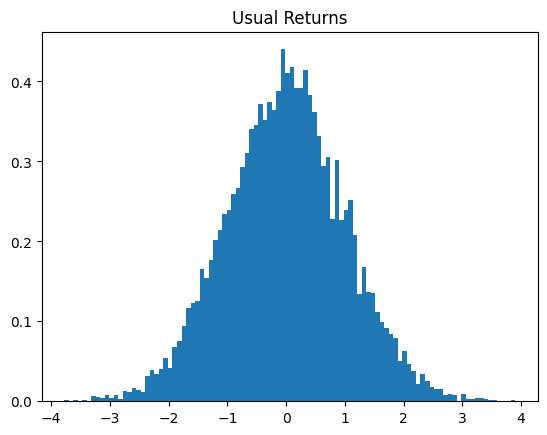

In [3]:
plt.hist(rv1, bins = 100, density = True)
plt.title("Usual Returns")
plt.show()

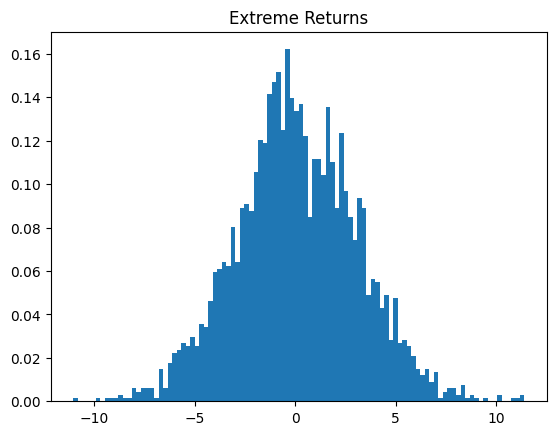

In [4]:
plt.hist(rv2, bins = 100, density = True)
plt.title("Extreme Returns")
plt.show()

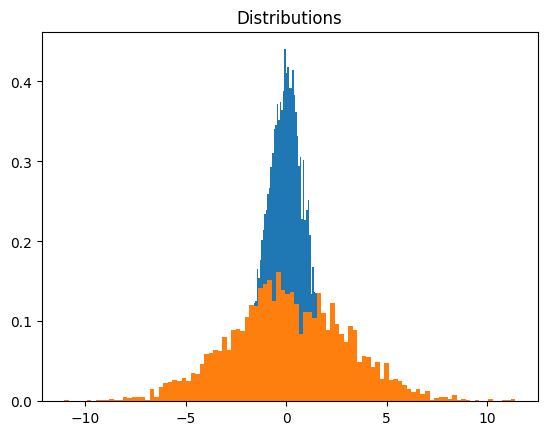

In [5]:
plt.hist(rv1, bins = 100, density = True)
plt.hist(rv2, bins = 100, density = True)
plt.title("Distributions")
plt.show()

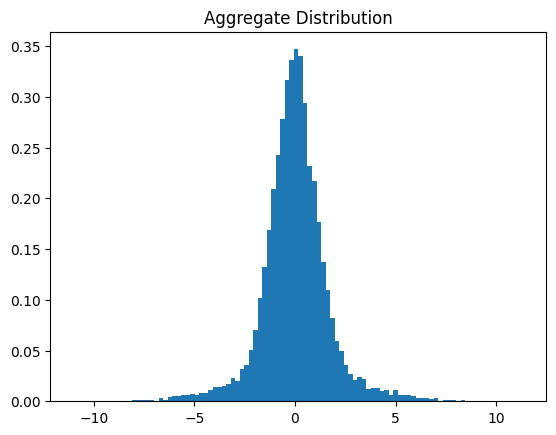

In [6]:
aggregate = np.append(rv1, rv2)
plt.hist(aggregate, bins = 100, density = True)
plt.title("Aggregate Distribution")
plt.show()

In [7]:
def get_distrib_stats(x):
    
    return {"mean":np.mean(x),"sd":np.std(x),"skew":skew(x),"kurtosis":kurtosis(x)}

def compare_distrib_stats():
    
    xx = [get_distrib_stats(d) for d in [usual, extreme, aggregate]]
    
    return pd.DataFrame(xx, index=["usual", "extreme", "aggregate"])

In [8]:
print("Usual Statistics: ", get_distrib_stats(rv1))

Usual Statistics:  {'mean': -0.007662928047952087, 'sd': 1.0082873434196786, 'skew': 0.006574885682741905, 'kurtosis': 0.05122207509741372}


In [9]:
print("Usual Statistics: ", get_distrib_stats(rv2))

Usual Statistics:  {'mean': 0.09099350036106958, 'sd': 3.0089152265935137, 'skew': 0.06375584435556977, 'kurtosis': 0.17220332624164847}


In [10]:
print("Usual Statistics: ", get_distrib_stats(aggregate))

Usual Statistics:  {'mean': 0.015103940046437522, 'sd': 1.6950064027654095, 'skew': 0.17009368382487708, 'kurtosis': 4.586925423513975}


$$
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix} = 
\begin{bmatrix}
p_{u,u} & p_{e,u}\\
p_{u,e} & p_{e,e}
\end{bmatrix}
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix}
$$

In [11]:
trans = np.array([
                [.9,.1],
                [.7,.3]]).T

print("transition matrix between the two states")
display(pd.DataFrame(trans, columns=["start usual","start extreme"], index=["end usual","end extreme"]))

print("steady state after many iterations")
x = np.array([.4,.6])   # arbitrary starting probabilities for 'usual' and 'extreme' regimes

for _ in range(100):
    x = trans.dot(x)    
    
print(f"probabilities in 'usual' and 'extreme' regimes: {x}")

transition matrix between the two states


,start usual,start extreme
end usual,0.9,0.7
end extreme,0.1,0.3


steady state after many iterations
probabilities in 'usual' and 'extreme' regimes: [0.875 0.125]


In [12]:
total_samples = 10000
steady_state = np.array(x)

n_usual, n_extreme = [int(x) for x in steady_state * total_samples]

usual = np.random.normal(0, 1, n_usual)
extreme = np.random.normal(0, 3, n_extreme)
aggregate = np.append(usual, extreme)

compare_distrib_stats()

,mean,sd,skew,kurtosis
usual,0.003997,1.002121,-0.000800,-0.000854
extreme,0.046222,2.947899,-0.104284,-0.233467
aggregate,0.009275,1.401847,-0.082815,4.437163


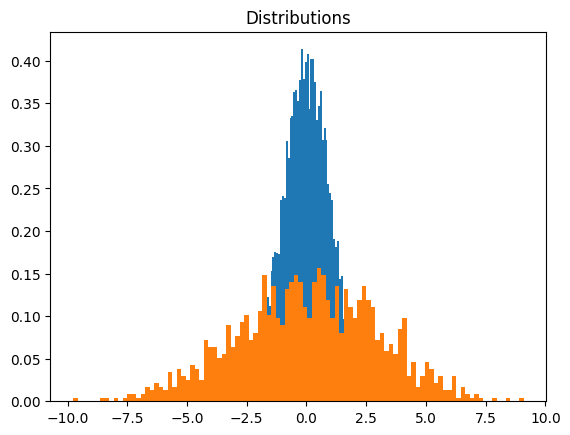

In [13]:
plt.hist(usual, bins = 100, density = True)
plt.hist(extreme, bins = 100, density = True)
plt.title("Distributions")
plt.show()

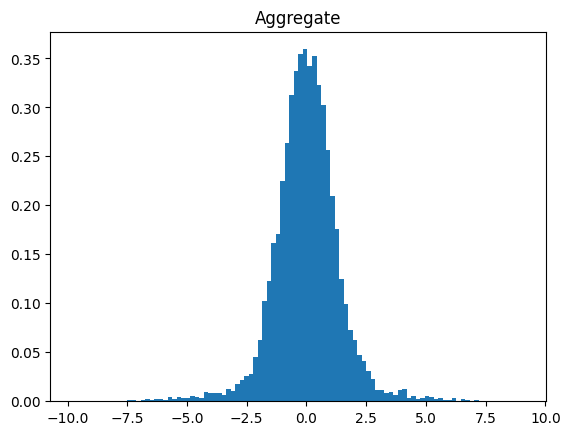

In [14]:
plt.hist(aggregate, bins = 100, density = True)
plt.title("Aggregate")
plt.show()